In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import os
import gluonts.torch
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator
from gluonts.dataset.split import split
from gluonts.dataset.pandas import PandasDataset

d:\TS\venv\lib\site-packages\gluonts\json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


### Подготовка данных для использования нейросетью

In [2]:
data = pd.read_csv('powerconsumption.csv')

In [10]:
data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [4]:
data.set_index('Datetime', inplace=True)

In [5]:
data.index = pd.to_datetime(data.index)

In [14]:
to_analyse = data[['Temperature','Datetime']]

In [23]:
to_analyse.index = pd.to_datetime(to_analyse.index)

In [6]:
to_analyse.head()

NameError: name 'to_analyse' is not defined

In [9]:
print(pd.infer_freq(data.index))

10T


In [8]:
pdts_data = PandasDataset(data, target='PowerConsumption_Zone1')
train,test = split(pdts_data, offset=-2500)

In [76]:
test = test.generate_instances(prediction_length = 2500, windows=1)

In [79]:
import numpy as np
import torch.optim as optim
import torch.utils.data as torch_data
 
model = DeepAREstimator(freq = '10min', prediction_length=2500, trainer_kwargs={'max_epochs':5})

EPOCHS = 1

In [80]:
predictor = model.train(train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


d:\TS\venv\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                           | Out sizes     
----------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 27.6 K | [[1, 1], [1, 1], [1, 3508, 6], [1, 3508], [1, 3508], [1, 2500, 6]] | [1, 100, 2500]
----------------------------------------------------------------------------------------------------------------------------
27.6 K    Trainable params
0         Non-trainable params
27.6 K    Total params
0.111     Total estimated model params size (MB)


Epoch 0: |          | 50/? [01:24<00:00,  0.59it/s, v_num=8, train_loss=10.70]

Epoch 0, global step 50: 'train_loss' reached 10.65205 (best 10.65205), saving model to 'd:\\TS\\Timeseries-Tasks\\HW13\\lightning_logs\\version_8\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [01:28<00:00,  0.57it/s, v_num=8, train_loss=9.220]

Epoch 1, global step 100: 'train_loss' reached 9.22026 (best 9.22026), saving model to 'd:\\TS\\Timeseries-Tasks\\HW13\\lightning_logs\\version_8\\checkpoints\\epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [01:29<00:00,  0.56it/s, v_num=8, train_loss=8.980]

Epoch 2, global step 150: 'train_loss' reached 8.97544 (best 8.97544), saving model to 'd:\\TS\\Timeseries-Tasks\\HW13\\lightning_logs\\version_8\\checkpoints\\epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [01:25<00:00,  0.58it/s, v_num=8, train_loss=8.900]

Epoch 3, global step 200: 'train_loss' reached 8.90317 (best 8.90317), saving model to 'd:\\TS\\Timeseries-Tasks\\HW13\\lightning_logs\\version_8\\checkpoints\\epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [01:30<00:00,  0.55it/s, v_num=8, train_loss=8.790]

Epoch 4, global step 250: 'train_loss' reached 8.78538 (best 8.78538), saving model to 'd:\\TS\\Timeseries-Tasks\\HW13\\lightning_logs\\version_8\\checkpoints\\epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: |          | 50/? [01:30<00:00,  0.55it/s, v_num=8, train_loss=8.790]


Описывается функция для обучения

#### Запуск обучения нейросети

Сохранение обученной сети

In [81]:
forecast = list(predictor.predict(test.input))

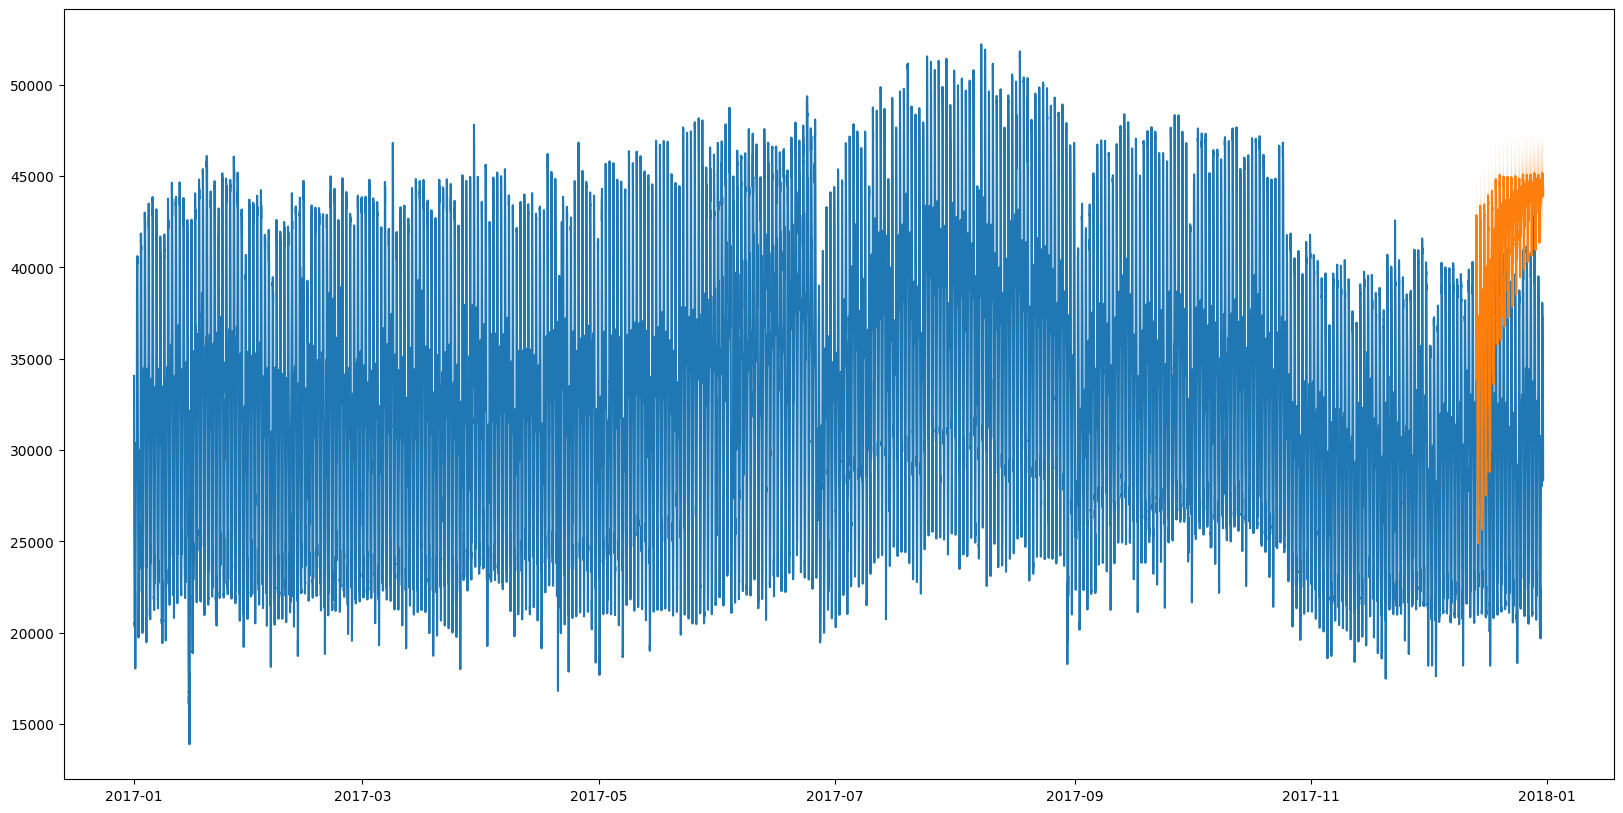

In [82]:
plt.figure(figsize=(20,10))
plt.plot(data['PowerConsumption_Zone1'])
for fore in forecast:
    fore.plot()